<a href="https://colab.research.google.com/github/PhonxayMax/Deep_Learning_with_PyToch_Eli_steven_Luca_Thomas/blob/main/Ch7_1_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from torchvision import datasets
data_path = 'https://www.cs.toronto.edu/~kriz/cifar.html'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

100%|██████████| 170M/170M [00:02<00:00, 59.3MB/s]


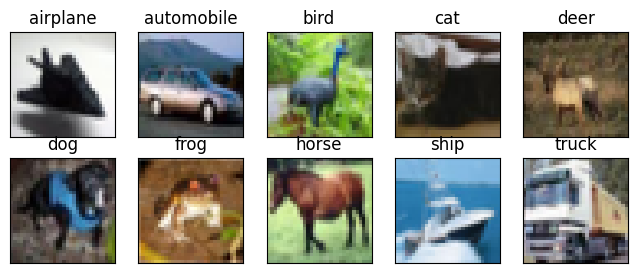

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [6]:
img, label = cifar10[99]  #99 is a sample index
img, label = cifar10[0]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 6, 'frog')

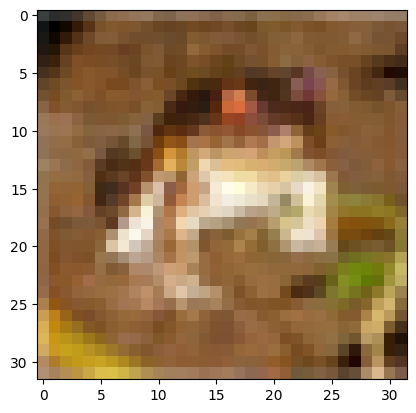

In [7]:
plt.imshow(img)
plt.show()

In [8]:
img, label = cifar10[3]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 4, 'deer')

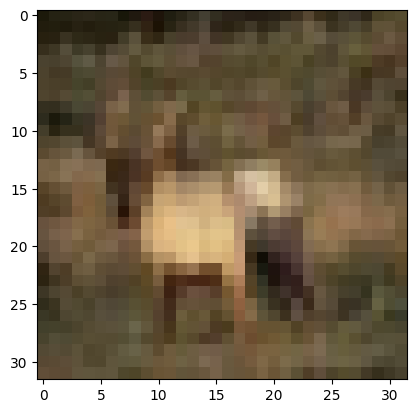

In [9]:
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [10]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [12]:
to_tenor = transforms.ToTensor()
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=to_tenor)

In [13]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [16]:
img_t.ndim, img_t.shape, img_t.dtype

(3, torch.Size([3, 32, 32]), torch.float32)

In [17]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

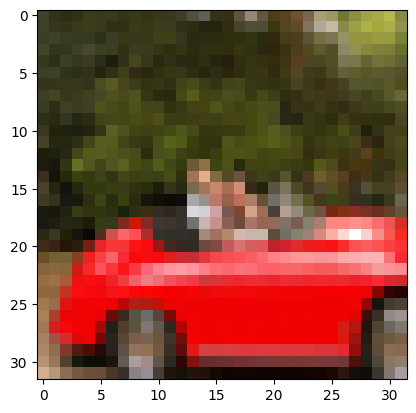

In [18]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

Tensor: train_images
  Rank (ndim): 4
  Shape     : (50000, 32, 32, 3)
  DType     : uint8
----------------------------------------
Tensor: train_labels
  Rank (ndim): 1
  Shape     : (50000,)
  DType     : int64
----------------------------------------
Tensor: test_images
  Rank (ndim): 4
  Shape     : (10000, 32, 32, 3)
  DType     : uint8
----------------------------------------
Tensor: test_labels
  Rank (ndim): 1
  Shape     : (10000,)
  DType     : int64
----------------------------------------


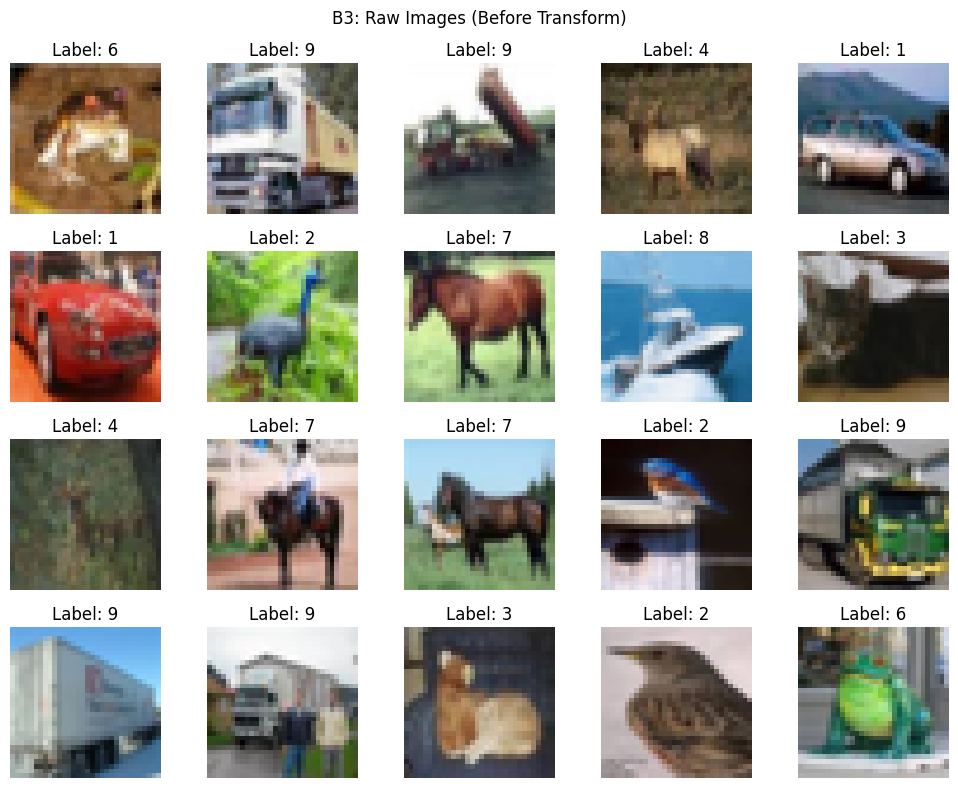

Tensor: train_tensor (after ToTensor)
  Rank (ndim): 3
  Shape     : torch.Size([3, 32, 32])
  DType     : torch.float32
----------------------------------------
Tensor: test_tensor (after ToTensor)
  Rank (ndim): 3
  Shape     : torch.Size([3, 32, 32])
  DType     : torch.float32
----------------------------------------


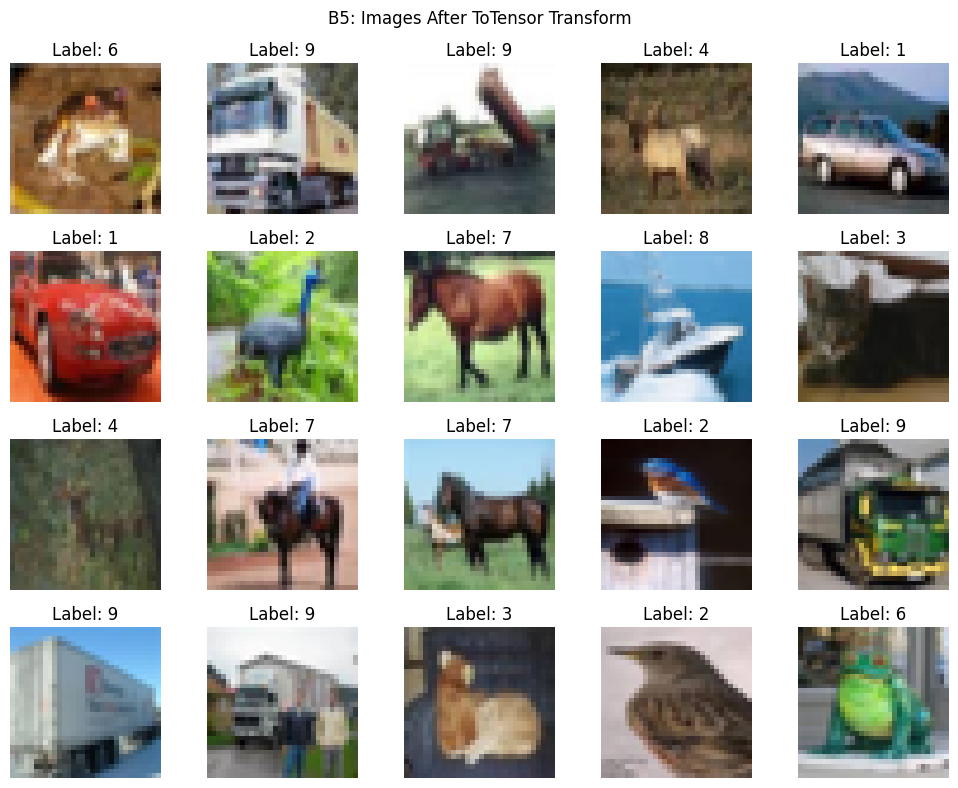

✅ B6: Verification — Image structure preserved.
   - Rank, shape, dtype now match expected input for PyTorch models.
   - Values now in [0.0, 1.0] instead of [0, 255].

💡 Suggestion:
   You can add normalization and/or augmentation:
   transforms.Compose([
       transforms.RandomHorizontalFlip(),
       transforms.ToTensor(),
       transforms.Normalize(mean, std)
   ])


In [35]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 🔧 Utility: Describe any tensor or array
# -----------------------------
def describe_tensor(name, tensor):
    print(f"Tensor: {name}")
    if isinstance(tensor, list):
        tensor = np.array(tensor)
    print(f"  Rank (ndim): {tensor.ndim}")
    print(f"  Shape     : {tensor.shape}")
    print(f"  DType     : {tensor.dtype}")
    print("-" * 40)

# -----------------------------
# 📦 B1: Load CIFAR-10 dataset
# -----------------------------
data_path = './data'

# Load raw version first (PIL format)
train_raw = datasets.CIFAR10(root=data_path, train=True, download=True)
test_raw = datasets.CIFAR10(root=data_path, train=False, download=True)

train_images, train_labels = train_raw.data, train_raw.targets
test_images, test_labels = test_raw.data, test_raw.targets

# -----------------------------
# 📊 B2: Describe key attributes (Rank, Shape, DType)
# -----------------------------
describe_tensor("train_images", train_images)
describe_tensor("train_labels", train_labels)
describe_tensor("test_images", test_images)
describe_tensor("test_labels", test_labels)

# -----------------------------
# 🖼️ B3: Plot 20 raw images in a 4x5 grid
# -----------------------------
def plot_image_grid(images, labels, title, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_image_grid(train_images[:20], train_labels[:20], "B3: Raw Images (Before Transform)")

# -----------------------------
# 🔁 B4: Apply transforms (ToTensor only)
# -----------------------------
transform = transforms.ToTensor()
train_transformed = datasets.CIFAR10(root=data_path, train=True, download=False, transform=transform)
test_transformed = datasets.CIFAR10(root=data_path, train=False, download=False, transform=transform)

# -----------------------------
# 🔍 B5: Describe and visualize after ToTensor
# -----------------------------
train_tensor, train_label = train_transformed[0]
test_tensor, test_label = test_transformed[0]

describe_tensor("train_tensor (after ToTensor)", train_tensor)
describe_tensor("test_tensor (after ToTensor)", test_tensor)

# Stack 20 tensors (each [3,32,32]) for grid plot
tensor_imgs = torch.stack([train_transformed[i][0] for i in range(20)])
tensor_labels = [train_transformed[i][1] for i in range(20)]

# Plot again in 4x5 grid
def plot_tensor_grid(tensors, labels, title, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
    for i, ax in enumerate(axes.flat):
        img_np = tensors[i].permute(1, 2, 0).numpy()  # C,H,W → H,W,C
        ax.imshow(img_np)
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_tensor_grid(tensor_imgs, tensor_labels, "B5: Images After ToTensor Transform")

# -----------------------------
# ✅ B6: Verification + Suggestions
# -----------------------------
print("✅ B6: Verification — Image structure preserved.")
print("   - Rank, shape, dtype now match expected input for PyTorch models.")
print("   - Values now in [0.0, 1.0] instead of [0, 255].")

print("\n💡 Suggestion:")
print("   You can add normalization and/or augmentation:")
print("   transforms.Compose([")
print("       transforms.RandomHorizontalFlip(),")
print("       transforms.ToTensor(),")
print("       transforms.Normalize(mean, std)")
print("   ])")



Tensor: train_images
  Rank (ndim): 4
  Shape     : (50000, 32, 32, 3)
  DType     : uint8
----------------------------------------
Tensor: train_labels
  Rank (ndim): 1
  Shape     : (50000,)
  DType     : int64
----------------------------------------
Tensor: test_images
  Rank (ndim): 4
  Shape     : (10000, 32, 32, 3)
  DType     : uint8
----------------------------------------
Tensor: test_labels
  Rank (ndim): 1
  Shape     : (10000,)
  DType     : int64
----------------------------------------


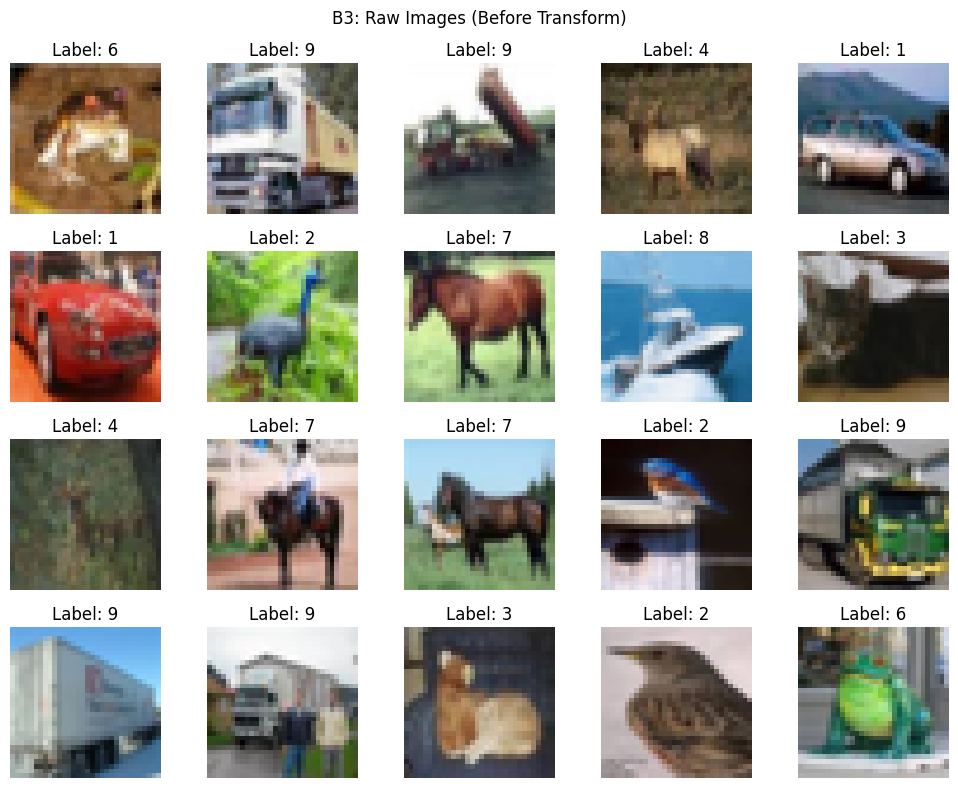

Tensor: train_tensor (after ToTensor)
  Rank (ndim): 3
  Shape     : torch.Size([3, 32, 32])
  DType     : torch.float32
----------------------------------------
Tensor: test_tensor (after ToTensor)
  Rank (ndim): 3
  Shape     : torch.Size([3, 32, 32])
  DType     : torch.float32
----------------------------------------


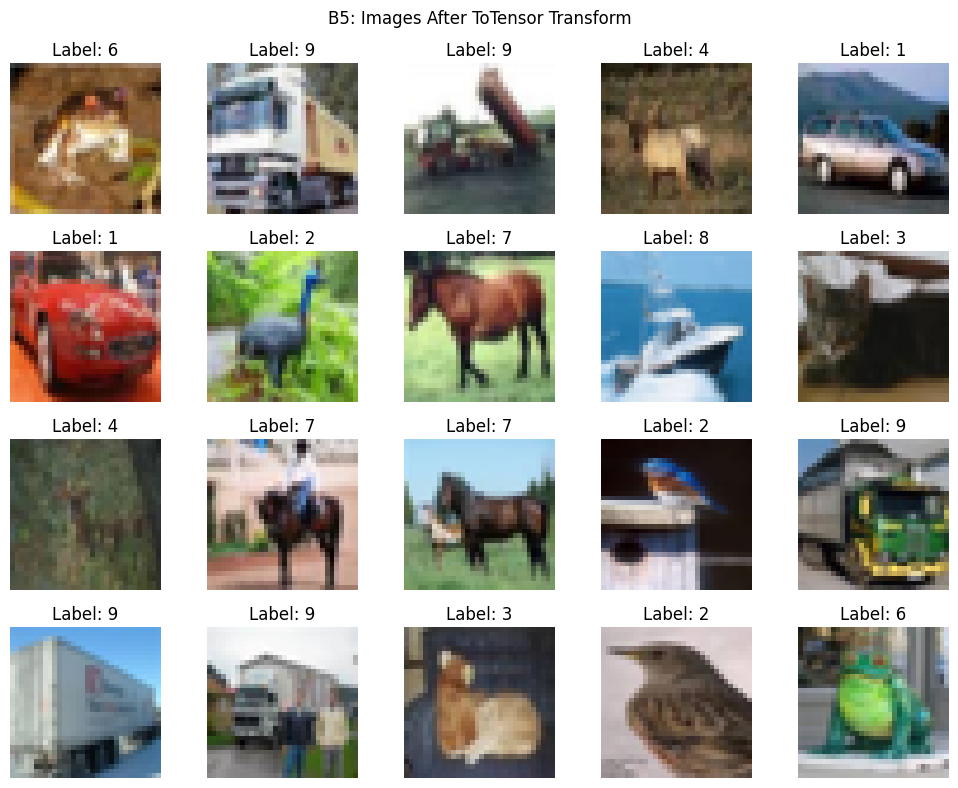

✅ B6: Verification — Image structure preserved.
   - Rank, shape, dtype now match expected input for PyTorch models.
   - Values now in [0.0, 1.0] instead of [0, 255].


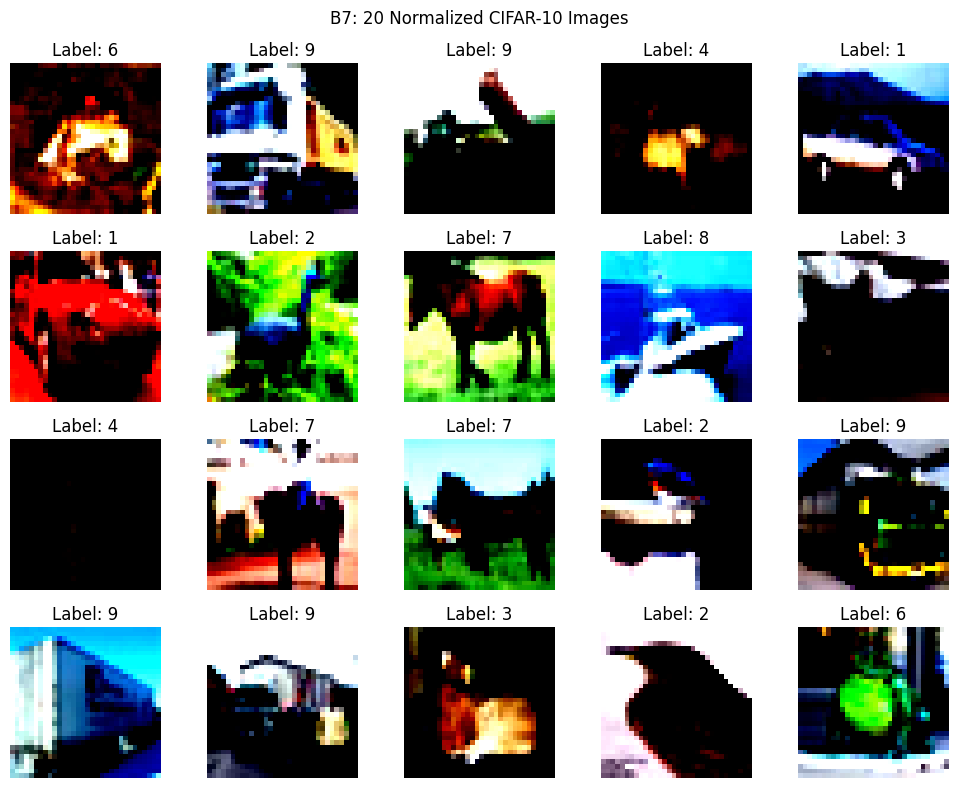

In [38]:
# Re-import everything after code execution state reset
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 🔧 Utility: Describe any tensor or array
# -----------------------------
def describe_tensor(name, tensor):
    print(f"Tensor: {name}")
    if isinstance(tensor, list):
        tensor = np.array(tensor)
    print(f"  Rank (ndim): {tensor.ndim}")
    print(f"  Shape     : {tensor.shape}")
    print(f"  DType     : {tensor.dtype}")
    print("-" * 40)

# -----------------------------
# 📦 B1: Load CIFAR-10 dataset
# -----------------------------
data_path = './data'

# Load raw version first (PIL format)
train_raw = datasets.CIFAR10(root=data_path, train=True, download=True)
test_raw = datasets.CIFAR10(root=data_path, train=False, download=True)

train_images, train_labels = train_raw.data, train_raw.targets
test_images, test_labels = test_raw.data, test_raw.targets

# -----------------------------
# 📊 B2: Describe key attributes (Rank, Shape, DType)
# -----------------------------
describe_tensor("train_images", train_images)
describe_tensor("train_labels", train_labels)
describe_tensor("test_images", test_images)
describe_tensor("test_labels", test_labels)

# -----------------------------
# 🖼️ B3: Plot 20 raw images in a 4x5 grid
# -----------------------------
def plot_image_grid(images, labels, title, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_image_grid(train_images[:20], train_labels[:20], "B3: Raw Images (Before Transform)")

# -----------------------------
# 🔁 B4: Apply transforms (ToTensor only)
# -----------------------------
transform = transforms.ToTensor()
train_transformed = datasets.CIFAR10(root=data_path, train=True, download=False, transform=transform)
test_transformed = datasets.CIFAR10(root=data_path, train=False, download=False, transform=transform)

# -----------------------------
# 🔍 B5: Describe and visualize after ToTensor
# -----------------------------
train_tensor, train_label = train_transformed[0]
test_tensor, test_label = test_transformed[0]

describe_tensor("train_tensor (after ToTensor)", train_tensor)
describe_tensor("test_tensor (after ToTensor)", test_tensor)

# Stack 20 tensors (each [3,32,32]) for grid plot
tensor_imgs = torch.stack([train_transformed[i][0] for i in range(20)])
tensor_labels = [train_transformed[i][1] for i in range(20)]

# Plot again in 4x5 grid
def plot_tensor_grid(tensors, labels, title, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
    for i, ax in enumerate(axes.flat):
        img_np = tensors[i].permute(1, 2, 0).numpy()  # C,H,W → H,W,C
        ax.imshow(img_np)
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_tensor_grid(tensor_imgs, tensor_labels, "B5: Images After ToTensor Transform")

# -----------------------------
# ✅ B6: Verification + Suggestions
# -----------------------------
print("✅ B6: Verification — Image structure preserved.")
print("   - Rank, shape, dtype now match expected input for PyTorch models.")
print("   - Values now in [0.0, 1.0] instead of [0, 255].")

# -----------------------------
# B7: Define normalized transform
mean = (0.4915, 0.4823, 0.4468)
std = (0.2470, 0.2435, 0.2616)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load transformed dataset
data_path = './data'
normalized_dataset = datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform)

# Plot 20 normalized images in 4x5 grid (memory-safe, no stacking)
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    img_t, label = normalized_dataset[i]
    img_np = img_t.permute(1, 2, 0).numpy()  # Convert CxHxW to HxWxC
    ax.imshow(img_np)
    ax.set_title(f"Label: {label}")
    ax.axis('off')

fig.suptitle("B7: 20 Normalized CIFAR-10 Images")
plt.tight_layout()
plt.show()


In [34]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

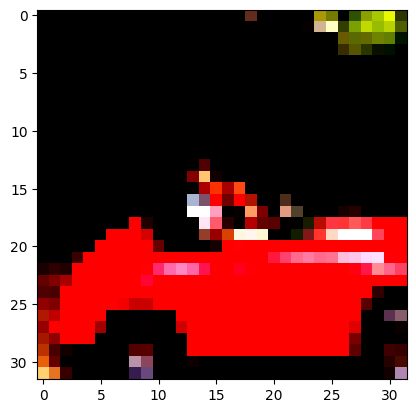

In [ ]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()